In [1]:
import networkx as nx

from manim import *

from selma import BACKGROUND
from selma.graph import gvlayout_factory, test_draw, MGraph, rescale_pos
from selma.datastructures import MQueue, MStack

config.background_color = BACKGROUND

In [2]:
class QBag:
  def __init__(self, width, scale):
    self.container = MQueue(width=width, scale=scale)
  def add_to_scene(self, scene):
    scene.add(self.container.rect.to_edge(UP))
  def take(self):
    return self.container.dequeue()
  def give(self, n):
    return self.container.enqueue(n)
  def is_empty(self):
    return not self.container.queue
  def peek(self):
    return self.container.queue[-1][1].text

class SBag:
  def __init__(self, width, scale):
    self.container = MStack(width=width, scale=scale)
  def take(self):
    return self.container.pop()
  def give(self, n):
    return self.container.push(n)
  def is_empty(self):
    return not self.container.stack
  def peek(self):
    return self.container.stack[-1][1].text

In [3]:
# Ronald L. Breiger and Philippa E. Pattison 
# Cumulated social roles: The duality of persons and their algebras,
# 1 Social Networks, Volume 8, Issue 3, September 1986, Pages 215-256

edges = [
  ('Acciaiuoli', 'Medici'),
  ('Medici', 'Barbadori'),
  ('Medici', 'Ridolfi'),
  ('Medici', 'Tornabuoni'),
  ('Medici', 'Albizzi'),
  ('Medici', 'Salviati'),
  ('Castellani', 'Peruzzi'),
  ('Castellani', 'Strozzi'),
  # ('Castellani', 'Barbadori'),
  ('Peruzzi', 'Strozzi'),
  ('Peruzzi', 'Bischeri'),
  ('Strozzi', 'Ridolfi'),
  ('Strozzi', 'Bischeri'),
  ('Ridolfi', 'Tornabuoni'),
  ('Tornabuoni', 'Guadagni'),
  ('Albizzi', 'Ginori'),
  ('Albizzi', 'Guadagni'),
  ('Salviati', 'Pazzi'),
  ('Bischeri', 'Guadagni'),
  ('Guadagni', 'Lamberteschi'),
  #
  ('Ginori', 'Acciaiuoli'),
  ('Barbadori', 'Castellani'),
]
G = nx.DiGraph(edges)

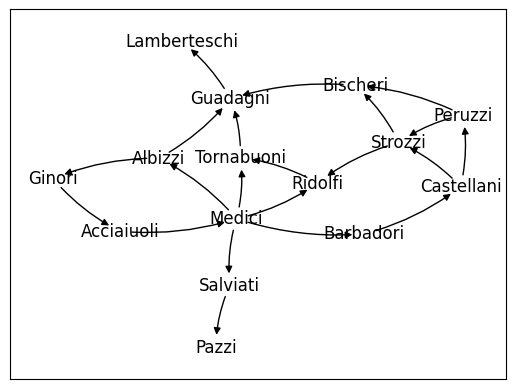

In [4]:
layout = gvlayout_factory('neato', heightscale=0.7)
test_draw(G, layout)

In [5]:
#%%manim --hide-splash -qm -v WARNING FlorentineFamilyGraph

class FlorentineFamilyGraph(Scene):
  def construct(self):
    MG = MGraph(G, layout, node_scale=.6)
    self.add(MG.mgraph)

In [6]:
#%%manim --hide-splash -qm -v WARNING FlorentineFamilyMarkedGraph

class FlorentineFamilyMarkedGraph(Scene):
  def construct(self):
    MG = MGraph(G, layout, node_scale=.6)
    self.add(MG.mgraph)

    def mark(n):
      mn = MG.mnode(n)
      mn[0].set_fill(color=GRAY_B, opacity=1)
      mn.set(stroke_color=GRAY)

    def highlight(s, color):
      ms = MG.mnode(s)
      ms.set(stroke_color=color)
      for t in G.neighbors(s):
        MG.medge(s, t).set_color(color)
      
    mark('Strozzi')
    highlight('Medici', PURE_GREEN)

In [7]:
def fast_visit(scene, bag, graph, start, wait):
  
  def highlight(s, turnon):
    color = PURE_GREEN if turnon else BLACK
    ms = graph.mnode(s)
    ms.set(stroke_color=color)
    for t in G.neighbors(s):
      graph.medge(s, t).set_color(color)
    if turnon: scene.wait(wait)
    
  def give(n):
    if n in give.nodes:
      return
    give.nodes.add(n)
    mn = graph.mnode(n)
    mn[0].set_fill(color=GRAY_B, opacity=1)
    mn.set(stroke_color=GRAY_B)
    bag.give(mn.copy())
  give.nodes = set()

  give(start)
  while not bag.is_empty():
    s = bag.peek()
    bag.take()
    highlight(s, True)
    for t in G.neighbors(s):
      give(t)
    highlight(s, False)


In [8]:
from string import ascii_uppercase

G = nx.erdos_renyi_graph(len(ascii_uppercase), 0.1, directed=True)
G = nx.relabel_nodes(G, lambda n: ascii_uppercase[n])

In [9]:
G = nx.erdos_renyi_graph(50, 0.1, directed=True)
G = nx.relabel_nodes(G, str)

In [10]:
G = nx.thresholded_random_geometric_graph(100, .15, 0.1)
G = nx.DiGraph(G.edges())
G = nx.relabel_nodes(G, str)

In [11]:
m, am = None, 0 
for n in G.nodes():
  sp = nx.shortest_path(G, n)
  if len(sp) > am:
    m, am = n, len(sp)
GG = nx.subgraph(G, nx.shortest_path(G, m))
print(n)

98


In [62]:
# from networkx.readwrite import json_graph
import json
import random

# load json-ed networkx datafile
with open("../../data/tesla_network.json") as infile:
    T = nx.json_graph.node_link_graph(json.load(infile), edges="links")

In [63]:
N = 100
random_nodes = random.sample(list(T.nodes()), N)
G = T.subgraph(random_nodes)

In [64]:
nodes = list(G.nodes())
pos = nx.get_node_attributes(G, "pos")
#G = nx.relabel_nodes(G, lambda n: str(nodes.index(n)))
pos2d = {nodes.index(n): p for n, p in pos.items()}
pos_array2d = rescale_pos(np.array([pos2d[n] for n in range(len(nodes))]), heightscale=.8)
pos_array3d = np.hstack((pos_array2d, np.zeros((pos_array2d.shape[0], 1))))
pos3d = {nodes[n]: pos_array3d[n] for n in range(len(nodes))}

In [65]:
E = nx.thresholded_random_geometric_graph(len(nodes), .1, .1, pos = pos2d)
E.edges()
GG = nx.DiGraph(E.edges())
strpos = {str(n): pos_array3d[n] for n in GG.nodes()}
GGs = nx.relabel_nodes(GG, str)

In [69]:
%%manim --hide-splash -qm -v WARNING Draw

def pos_layout(G):
  return strpos

class Draw(Scene):
  def construct(self):
    MG = MGraph(GGs, pos_layout, node_scale=.5)
    self.add(MG.mgraph)
    fast_visit(self, SBag(1, 0.6), MG, list(GGs.nodes())[0], .5)

/home/santini/Documents/Activities/Talks/cremona-2025/selma/geom.py:168: UserWarning: Expected 1 intersection with Rectangle, got 0.
  warnings.warn(f'Expected 1 intersection with {rect}, got {len(candidate)}.')


NetworkXError: The node 0 is not in the graph.

In [ ]:
def animate_visit(scene, bag, graph, start):
  
  dot = Dot(color=PURE_GREEN)
  def highlight(s, turnon):
    color = PURE_GREEN if turnon else BLACK
    ms = graph.mnode(s)
    ms.set(stroke_color=color)
    if turnon: 
      dot.move_to(ms.get_center())
      scene.add(dot)
      scene.wait(1)
    for t in G.neighbors(s):
      graph.medge(s, t).set_color(color)
    if not turnon:
      scene.remove(dot)
    
  def give(n):
    if n in give.nodes:
      return
    give.nodes.add(n)
    mn = graph.mnode(n)
    mn[0].set_fill(color=GRAY_B, opacity=1)
    mn.set(stroke_color=GRAY_B)
    scene.play(bag.give(mn.copy()), run_time=0.5)
  give.nodes = set()

  give(start)
  while not bag.is_empty():
    s = bag.peek()
    scene.play(bag.take(), run_time=0.5)
    highlight(s, True)
    for t in G.neighbors(s):
      scene.play(graph.movealong(dot, s, t), run_time=0.5)
      give(t)
    highlight(s, False)


In [ ]:
%%manim --renderer=opengl --hide-splash -pqm -v WARNING BFS
#%%manim --renderer=cairo --hide-splash -qm -v WARNING BFS

  
class BFS(Scene):
  def construct(self):
    
    bag = QBag(width=12, scale=.6)
    bag.container.rect.to_edge(UP)
    self.add(bag.container.rect)

    graph = MGraph(G, layout, scale=0.8, node_scale=0.6)
    graph.shift(DOWN / 2)
    self.add(graph.mgraph)

    animate_visit(self, bag, graph, 'Medici')

/home/santini/Documents/Activities/Talks/cremona-2025/.venv/lib/python3.12/site-packages/manim/mobject/geometry/arc.py:424: UserWarning: Can't find Arc center, using ORIGIN instead
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (19, 3) + inhomogeneous part.

In [ ]:
%%manim --renderer=opengl --hide-splash -pqm -v WARNING DFS
#%%manim --renderer=cairo --hide-splash -qm -v WARNING DFS

  
class DFS(Scene):
  def construct(self):
    
    bag = SBag(width=12, scale=.6)
    bag.container.rect.to_edge(UP)
    self.add(bag.container.rect)

    graph = MGraph(G, layout, scale=0.8, node_scale=0.6)
    graph.shift(DOWN / 2)
    self.add(graph.mgraph)

    animate_visit(self, bag, graph, 'Medici')